编制程序实现等深分箱平均数平滑、中位数平滑和箱边界平滑，并根据结果进行对比

In [9]:
# 保存数据
# import numpy as np
# data=np.array([80,90,100,150,300,250,1600,230,200,210,170,400,-800,500,530,550])
# np.savetxt("./data/class05/origin.csv", data, fmt="%d", newline=' ')

In [10]:
import numpy as np

# 等深分箱
def deep_equal_boxed(data, H):
    Box = []
    Box_index = []
    sorted_data = sorted(data)
    sorted_data_index = list(np.argsort(data))
    index = 0
    while index < len(data):
        Box.append(sorted_data[index:index+H])
        Box_index.append(sorted_data_index[index:index+H])
        index += H
    return Box, Box_index

# 均值平滑
def mean_smooth(data):
    dims = len(np.array(data).shape)
    assert(dims == 2)
    smooth_data = []
    for array in np.array(data):
        array = np.full(array.shape, np.mean(array))
        smooth_data.append(array.tolist())
    return smooth_data

# 中值平滑
def median_smooth(data):
    dims = len(np.array(data).shape)
    assert(dims == 2)
    median_data = []
    for array in np.array(data):
        array = np.full(array.shape, np.median(array))
        median_data.append(array.tolist())
    return median_data

# 边界平滑
def boundary_smooth(data):
    dims = len(np.array(data).shape)
    assert(dims == 2)
    boundary_data = []
    for array in data:
        left_bound = array[0]
        right_bound = array[len(array)-1]
        boundary_data.append([left_bound if x-left_bound <= right_bound-x else right_bound for x in array])
    return boundary_data

# 按索引位置重排列
def normalize_data(data, index, keepshape = False):
    tmp_index = np.squeeze(np.array(index).reshape(1,-1)).tolist()
    tmp_data = np.squeeze(np.array(data).reshape(1,-1)).tolist()
    assert(len(tmp_data) == len(tmp_index))
    res_data = [x for x in tmp_data]
    for i in range(len(tmp_data)):
        res_data[tmp_index[i]] = tmp_data[i]
    if keepshape:
        res_data = np.array(res_data).reshape(np.array(data).shape).tolist()
    return res_data


In [11]:
import numpy as np
# 读取原始数据
# origin_data = np.array(np.loadtxt("./data/class05/origin.csv").astype(int))
origin_data = np.array([6,11,205,14,16,216,36,51,12,56,73,93])
# 对数据排序分箱
origin_data, index = deep_equal_boxed(origin_data, 4)
# 均值平滑
mean_data = mean_smooth(origin_data)
# 中值平滑
median_data = median_smooth(origin_data)
# 边界平滑
boundary_data = boundary_smooth(origin_data)

print(origin_data,mean_data, median_data, boundary_data, sep='\n')

[[6, 11, 12, 14], [16, 36, 51, 56], [73, 93, 205, 216]]
[[10.75, 10.75, 10.75, 10.75], [39.75, 39.75, 39.75, 39.75], [146.75, 146.75, 146.75, 146.75]]
[[11.5, 11.5, 11.5, 11.5], [43.5, 43.5, 43.5, 43.5], [149.0, 149.0, 149.0, 149.0]]
[[6, 14, 14, 14], [16, 16, 56, 56], [73, 73, 216, 216]]


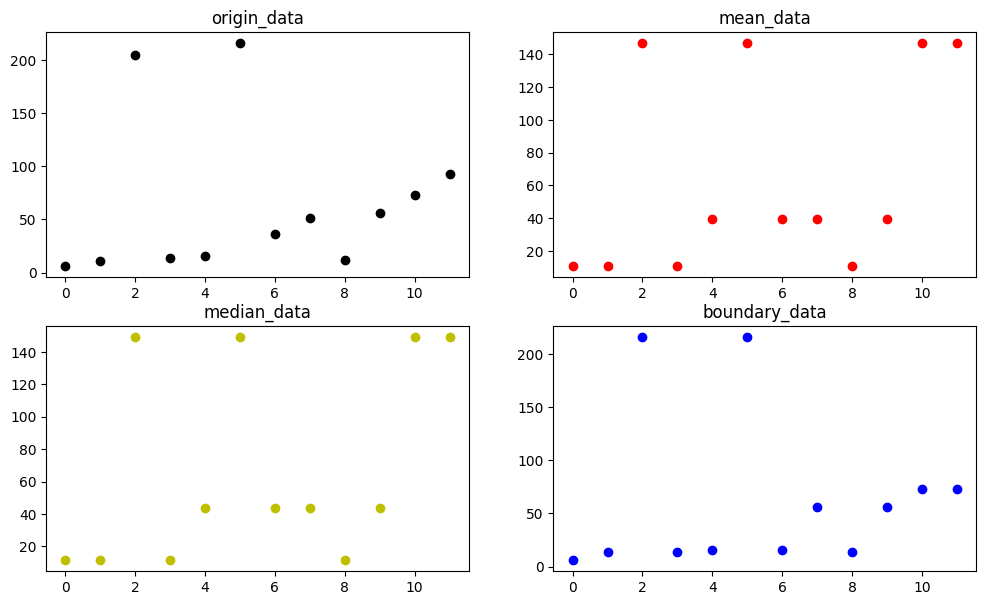

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
plt.title("origin_data")
x0 = index
y0 = origin_data
plt.scatter(x0, y0, c='k')
plt.subplot(2,2,2)
plt.title("mean_data")
x1 = index
y1 = mean_data
plt.scatter(x1, y1, c='r')
plt.subplot(2,2,3)
plt.title("median_data")
x2 = index
y2 = median_data
plt.scatter(x2, y2, c='y')
plt.subplot(2,2,4)
plt.title("boundary_data")
x3 = index
y3 = boundary_data
plt.scatter(x3, y3, c='b')

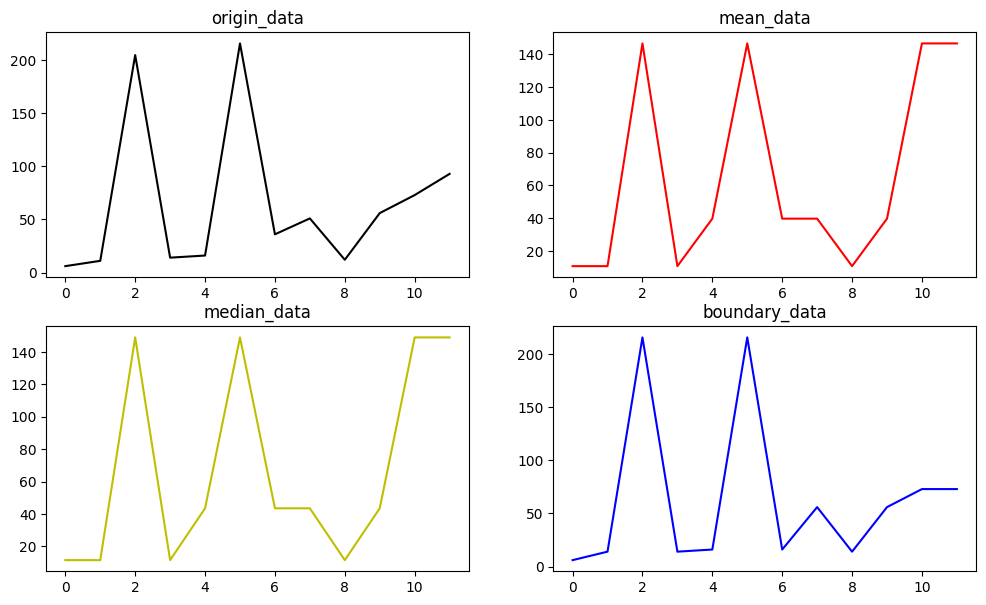

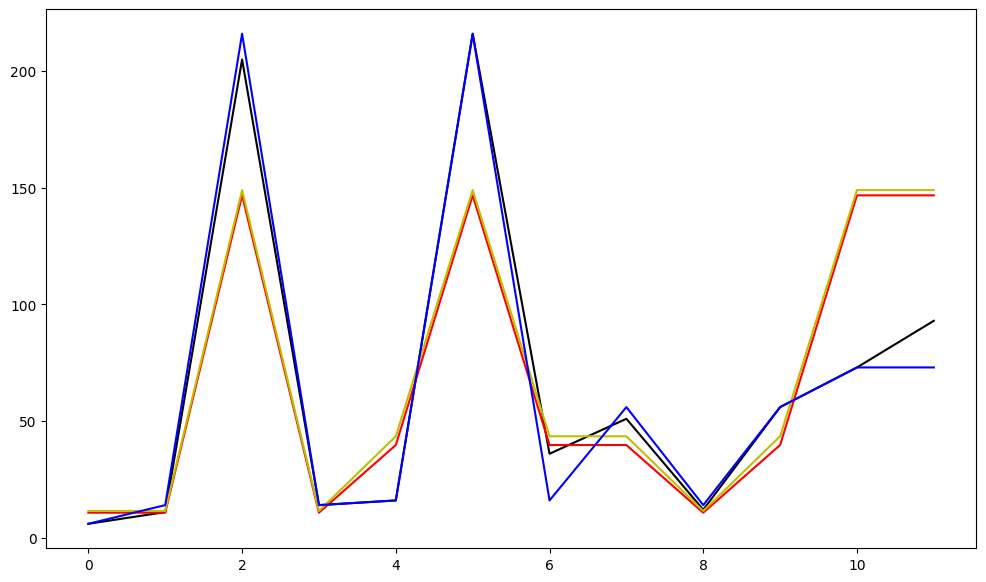

In [13]:
import matplotlib.pyplot as plt

origin_data = normalize_data(origin_data, index)
mean_data = normalize_data(mean_data, index)
median_data = normalize_data(median_data, index)
boundary_data = normalize_data(boundary_data, index)

data_dict = {"origin_data":[1,origin_data,'k'], "mean_data":[2,mean_data,'r'],
             "median_data":[3,median_data,'y'], "boundary_data":[4,boundary_data,'b']}

# 独立绘图
plt.figure(figsize=(12,7))
for data_info in data_dict.keys():
    plt.subplot(2,2,data_dict[data_info][0])
    plt.title(data_info)
    plt.plot(data_dict[data_info][1], c=data_dict[data_info][2])
    
# 综合绘图
plt.figure(figsize=(12,7))
for data_info in data_dict.keys():
    plt.plot(data_dict[data_info][1], label=data_info, c=data_dict[data_info][2])
    
    